# Weather API Data Analysis – 10 Day Forecast

## Objective
To analyze 10-day weather forecast data for a selected city using a public Weather API, extract daily minimum and maximum temperatures, and identify the highest and lowest temperatures across the forecast period to understand short-term temperature patterns.

## 1. Import Required Libraries

In [1]:
import requests
import json
from datetime import datetime

import os

from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv("OPENWEATHER_API_KEY")

## Data Source
Weather data of Hyderabad city, India is fetched using the OpenWeather API, which returns forecast data in JSON format.

## 2. API URL & Request

In [2]:
url=f'https://api.openweathermap.org/data/2.5/forecast?q=Hyderabad,IN&units=metric&appid={API_KEY}'
resp=requests.get(url)

## 3. Response Validation

In [3]:
print(url)

https://api.openweathermap.org/data/2.5/forecast?q=Hyderabad,IN&units=metric&appid=54135abe53160ca54ae7094dedd58391


In [4]:
print(API_KEY)

54135abe53160ca54ae7094dedd58391


In [5]:
print(resp.status_code)

200


In [6]:
if resp.status_code==200:
    print("Response object loaded successfully")
    data=resp.content
else:
    print("Response object failed to load")

Response object loaded successfully


In [7]:
type(data)

bytes

---
## 4. JSON Parsing (Bytes → Python Dictionary)

In [8]:

data=json.loads(data)

In [9]:
type(data)

dict

In [10]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1767808800,
   'main': {'temp': 18.01,
    'feels_like': 16.83,
    'temp_min': 18.01,
    'temp_max': 18.01,
    'pressure': 1019,
    'sea_level': 1019,
    'grnd_level': 954,
    'humidity': 37,
    'temp_kf': 0},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 4},
   'wind': {'speed': 1.91, 'deg': 80, 'gust': 2.45},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2026-01-07 18:00:00'},
  {'dt': 1767819600,
   'main': {'temp': 17.43,
    'feels_like': 16.22,
    'temp_min': 16.28,
    'temp_max': 17.43,
    'pressure': 1019,
    'sea_level': 1019,
    'grnd_level': 953,
    'humidity': 38,
    'temp_kf': 1.15},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 4},
   'wind': {'speed': 2.73, 'deg': 84, 'gust': 3.58},
   'visibility': 10000,
   'pop':

## 5. Data Structure Exploration

In [11]:
data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [12]:
print(type(data['list']))

<class 'list'>


In [13]:
data['list']

[{'dt': 1767808800,
  'main': {'temp': 18.01,
   'feels_like': 16.83,
   'temp_min': 18.01,
   'temp_max': 18.01,
   'pressure': 1019,
   'sea_level': 1019,
   'grnd_level': 954,
   'humidity': 37,
   'temp_kf': 0},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'clouds': {'all': 4},
  'wind': {'speed': 1.91, 'deg': 80, 'gust': 2.45},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2026-01-07 18:00:00'},
 {'dt': 1767819600,
  'main': {'temp': 17.43,
   'feels_like': 16.22,
   'temp_min': 16.28,
   'temp_max': 17.43,
   'pressure': 1019,
   'sea_level': 1019,
   'grnd_level': 953,
   'humidity': 38,
   'temp_kf': 1.15},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'clouds': {'all': 4},
  'wind': {'speed': 2.73, 'deg': 84, 'gust': 3.58},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2026-01-07 21:00:00'},
 {'dt': 1767830400,
  'ma

In [14]:
data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [15]:
data['list'][0] # we have our analysis required 'dt' in list, and min and max temperatures in temp list.

{'dt': 1767808800,
 'main': {'temp': 18.01,
  'feels_like': 16.83,
  'temp_min': 18.01,
  'temp_max': 18.01,
  'pressure': 1019,
  'sea_level': 1019,
  'grnd_level': 954,
  'humidity': 37,
  'temp_kf': 0},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'clouds': {'all': 4},
 'wind': {'speed': 1.91, 'deg': 80, 'gust': 2.45},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'n'},
 'dt_txt': '2026-01-07 18:00:00'}

In [16]:
data['list'][0].keys()

dict_keys(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys', 'dt_txt'])

In [17]:
print(type(data['list'][0]['main']))

<class 'dict'>


In [18]:
print(data['list'][0]['main'].keys())

dict_keys(['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity', 'temp_kf'])


In [19]:
weather_list=data['list']
weather_list[0]['main']

{'temp': 18.01,
 'feels_like': 16.83,
 'temp_min': 18.01,
 'temp_max': 18.01,
 'pressure': 1019,
 'sea_level': 1019,
 'grnd_level': 954,
 'humidity': 37,
 'temp_kf': 0}

In [20]:
weather_list[0]['dt'] # use datetime 

1767808800

## 6. Daily Temperature Extraction

In [21]:
from datetime import datetime, UTC
maxtemp=[]
mintemp=[] # to collect max and min temperatures from temp.

for each in weather_list:
    date_ts=each['dt'] #this gives unix timestamp
    date=datetime.fromtimestamp(date_ts, UTC).strftime('%d-%m-%y') #correct date conversion
    maxtemp=each['main']['temp_max']
    mintemp=each['main']['temp_min']

    print(f'Date:{date} | Min Temp: {mintemp} | Max Temp: {maxtemp}')


Date:07-01-26 | Min Temp: 18.01 | Max Temp: 18.01
Date:07-01-26 | Min Temp: 16.28 | Max Temp: 17.43
Date:08-01-26 | Min Temp: 14.81 | Max Temp: 15.88
Date:08-01-26 | Min Temp: 18.07 | Max Temp: 18.07
Date:08-01-26 | Min Temp: 24.17 | Max Temp: 24.17
Date:08-01-26 | Min Temp: 26.12 | Max Temp: 26.12
Date:08-01-26 | Min Temp: 23.7 | Max Temp: 23.7
Date:08-01-26 | Min Temp: 20.23 | Max Temp: 20.23
Date:08-01-26 | Min Temp: 18.93 | Max Temp: 18.93
Date:08-01-26 | Min Temp: 17.32 | Max Temp: 17.32
Date:09-01-26 | Min Temp: 15.78 | Max Temp: 15.78
Date:09-01-26 | Min Temp: 17.83 | Max Temp: 17.83
Date:09-01-26 | Min Temp: 24.34 | Max Temp: 24.34
Date:09-01-26 | Min Temp: 26.61 | Max Temp: 26.61
Date:09-01-26 | Min Temp: 24.03 | Max Temp: 24.03
Date:09-01-26 | Min Temp: 19.84 | Max Temp: 19.84
Date:09-01-26 | Min Temp: 18.24 | Max Temp: 18.24
Date:09-01-26 | Min Temp: 17.33 | Max Temp: 17.33
Date:10-01-26 | Min Temp: 15.63 | Max Temp: 15.63
Date:10-01-26 | Min Temp: 18.99 | Max Temp: 18.99
Da

---
## 7: Daily Temperature Aggregation (CORE ANALYSIS)

### 7.1 Create a structured list (row-wise data)

In [22]:
rows=[]
for each in weather_list:
    date=datetime.fromtimestamp(each['dt'],UTC).strftime('%d-%m-%y')
    min_temp=each['main']['temp_min']
    max_temp=each['main']['temp_max']

    rows.append([date,min_temp,max_temp])
rows #rows is a list, each item inside it is also a list. This structure is called List of lists

[['07-01-26', 18.01, 18.01],
 ['07-01-26', 16.28, 17.43],
 ['08-01-26', 14.81, 15.88],
 ['08-01-26', 18.07, 18.07],
 ['08-01-26', 24.17, 24.17],
 ['08-01-26', 26.12, 26.12],
 ['08-01-26', 23.7, 23.7],
 ['08-01-26', 20.23, 20.23],
 ['08-01-26', 18.93, 18.93],
 ['08-01-26', 17.32, 17.32],
 ['09-01-26', 15.78, 15.78],
 ['09-01-26', 17.83, 17.83],
 ['09-01-26', 24.34, 24.34],
 ['09-01-26', 26.61, 26.61],
 ['09-01-26', 24.03, 24.03],
 ['09-01-26', 19.84, 19.84],
 ['09-01-26', 18.24, 18.24],
 ['09-01-26', 17.33, 17.33],
 ['10-01-26', 15.63, 15.63],
 ['10-01-26', 18.99, 18.99],
 ['10-01-26', 24.66, 24.66],
 ['10-01-26', 26.91, 26.91],
 ['10-01-26', 24.17, 24.17],
 ['10-01-26', 20.23, 20.23],
 ['10-01-26', 18.36, 18.36],
 ['10-01-26', 17.54, 17.54],
 ['11-01-26', 16.27, 16.27],
 ['11-01-26', 18.98, 18.98],
 ['11-01-26', 25.58, 25.58],
 ['11-01-26', 27.71, 27.71],
 ['11-01-26', 24.91, 24.91],
 ['11-01-26', 20.26, 20.26],
 ['11-01-26', 18.81, 18.81],
 ['11-01-26', 17.76, 17.76],
 ['12-01-26', 16

---
### 7.2: Convert list to DataFrame

In [23]:
import pandas as pd
df=pd.DataFrame(rows,columns=['Date','Min_Temp','Max_Temp']) # This line converts a list of extracted values into a structured pandas DataFrame with named columns.
df.head()               

,Date,Min_Temp,Max_Temp
0,07-01-26,18.01,18.01
1,07-01-26,16.28,17.43
2,08-01-26,14.81,15.88
3,08-01-26,18.07,18.07
4,08-01-26,24.17,24.17


---
### 7.3: Aggregate to DAILY level

#Group by Date → find min and max for each group

In [31]:
daily_weather = df.groupby('Date')[['Min_Temp', 'Max_Temp']].agg({
    'Min_Temp': 'min',
    'Max_Temp': 'max'
}).reset_index()
daily_weather.head() 
#Compress 8 rows → 1 row per day using agg

,Date,Min_Temp,Max_Temp
0,07-01-26,16.28,18.01
1,08-01-26,14.81,26.12
2,09-01-26,15.78,26.61
3,10-01-26,15.63,26.91
4,11-01-26,16.27,27.71


---
## Insights

- The weather forecast data is available at 3-hour intervals and was aggregated to daily level for analysis.
- Daily minimum and maximum temperatures vary noticeably across days, indicating clear intraday temperature fluctuations.
- Peak temperatures are consistently higher than early morning or night-time temperatures.
- Aggregating data to daily level makes the forecast easier to interpret and suitable for trend analysis.


---
## Step 7.4: Clean Column Names

In [39]:
daily_weather=daily_weather.rename(columns={
    'Min_Temp':'Daily_Min_temp',
    'Max_Temp':'Daily_Max_temp'
})

In [40]:
daily_weather.head()

,Date,Daily_Min_temp,Daily_Max_temp
0,07-01-26,16.28,18.01
1,08-01-26,14.81,26.12
2,09-01-26,15.78,26.61
3,10-01-26,15.63,26.91
4,11-01-26,16.27,27.71


---
## Step 7.5: Sort by Date

In [41]:
daily_weather=daily_weather.sort_values('Date')
daily_weather
# Required for plotting & forecasting to maintain chronological order

,Date,Daily_Min_temp,Daily_Max_temp
0,07-01-26,16.28,18.01
1,08-01-26,14.81,26.12
2,09-01-26,15.78,26.61
3,10-01-26,15.63,26.91
4,11-01-26,16.27,27.71
5,12-01-26,16.33,27.81


## Step 7.6: Basic Validation

In [33]:
daily_weather.describe()

,Min_Temp,Max_Temp
count,6.000000,6.000000
mean,15.850000,25.528333
std,0.587639,3.739521
min,14.810000,18.010000
25%,15.667500,26.242500
50%,16.025000,26.760000
75%,16.277500,27.510000
max,16.330000,27.810000


## 7.7: Simple Visualization

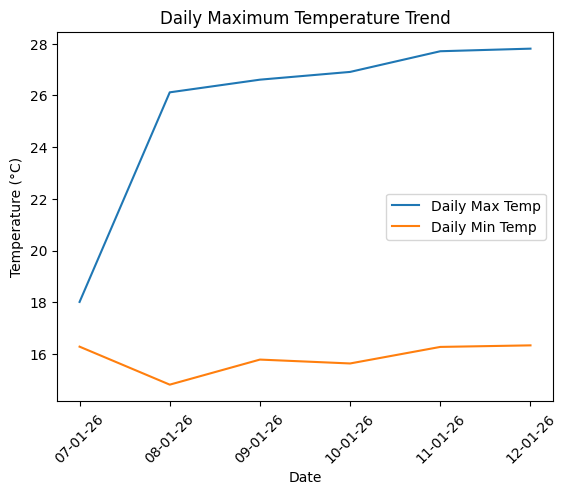

In [45]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(daily_weather['Date'], daily_weather['Daily_Max_temp'], label='Daily Max Temp')
plt.plot(daily_weather['Date'], daily_weather['Daily_Min_temp'], label='Daily Min Temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Maximum Temperature Trend')
plt.xticks(rotation=45)

plt.legend()
plt.show()


---
## Step 7.8: Final Insights

- Weather forecast data is available at 3-hour intervals and was aggregated to daily level for analysis.
- Daily minimum and maximum temperatures show noticeable variation across days.
- Aggregated daily data simplifies interpretation and supports trend analysis.
- Visual comparison of daily minimum and maximum temperatures highlights intraday temperature range across the forecast period.
- The resulting dataset is suitable for reporting and further time-series analysis.
